# 1. Import Libraries

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

# 2. Load dataset 

In [2]:
dataset_path = "dataset/mall_customers.csv"
customer_df = pd.read_csv(dataset_path, encoding='ISO-8859-1')

# 3.  basic data exploration to understand the structure and contents of the dataset

In [3]:
print('Dataset/Dataframe dimensions:', customer_df.shape)

print("First few rows of the dataset:")
display(customer_df.head())

Dataset/Dataframe dimensions: (200, 5)
First few rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("\nSummary statistics of numerical columns:")
display(customer_df.describe())


Summary statistics of numerical columns:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 3.1 Calculate null percentange

In [5]:
tab_info_df=pd.DataFrame(customer_df.dtypes).T.rename(index={0:'column type'})
tab_info_df = pd.concat([tab_info_df, pd.DataFrame(customer_df.isnull().sum()).T.rename(index={0: 'null values (nb)'})])
tab_info_df=pd.concat([tab_info_df, pd.DataFrame(customer_df.isnull().sum()/customer_df.shape[0]*100).T.rename(index={0:'null values (%)'})])

display(tab_info_df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
column type,int64,object,int64,int64,int64
null values (nb),0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0


## 3.2 converting the data type of column **gender** to 'category'

In [6]:
customer_df['Gender'] = customer_df['Gender'].astype('category')
print(customer_df.dtypes)

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object


# 4. Exploratory Data Analysis (EDA):

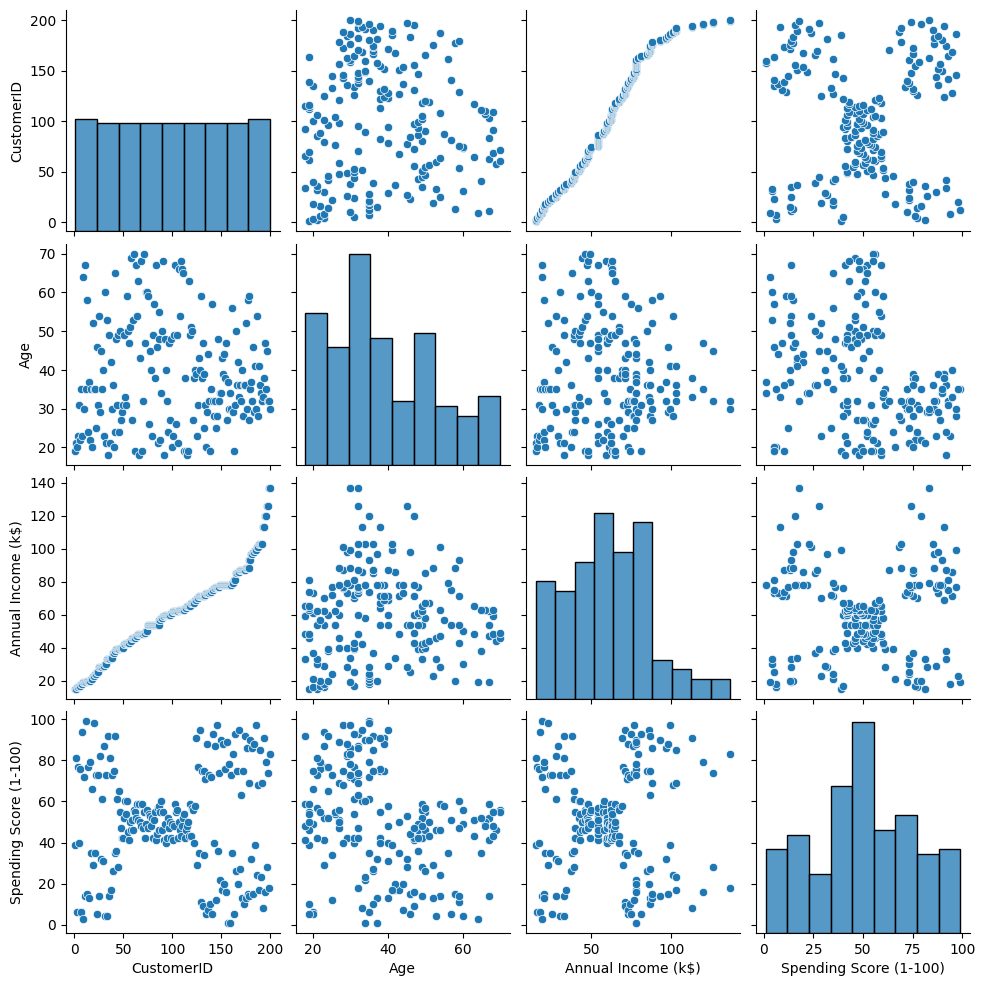

In [7]:
sns.pairplot(customer_df)


## 4.1 Pairplot focusing on segmentation features

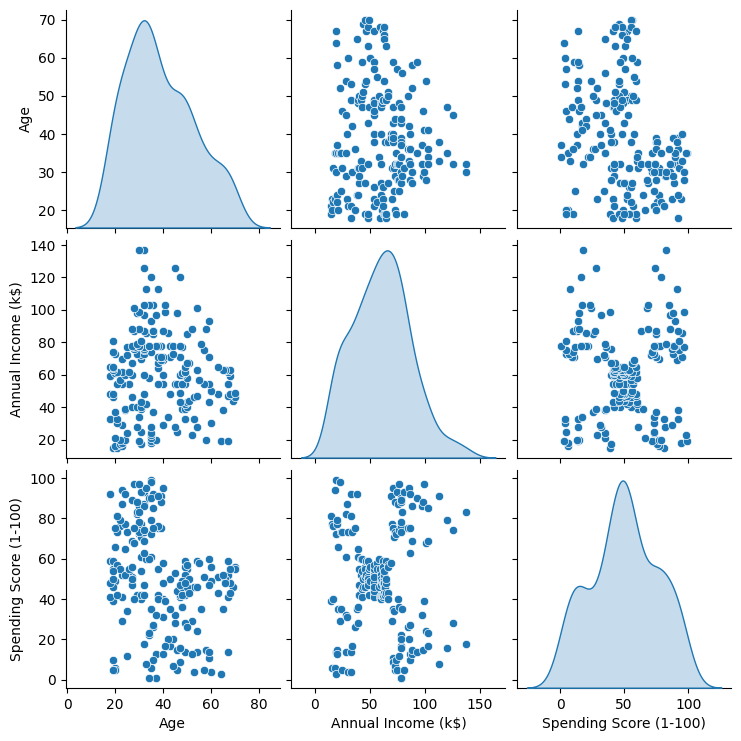

In [8]:
sns.pairplot(customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind="kde")

## 4.2 Boxplots for feature distributions across genders

C:\Users\user\AppData\Local\Temp\ipykernel_2544\497407752.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1000x600 with 0 Axes>

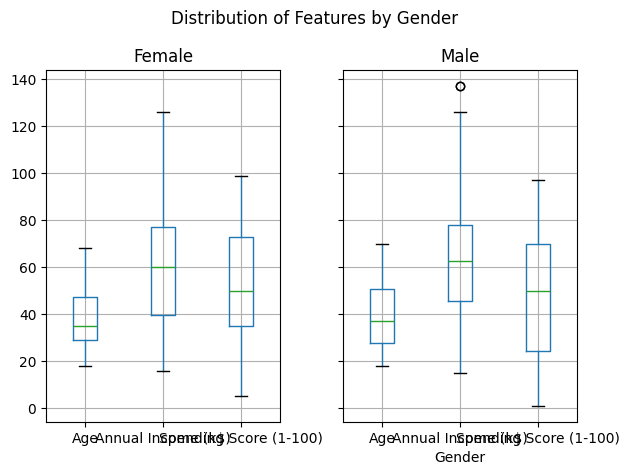

In [9]:
plt.figure(figsize=(10, 6))
customer_df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].boxplot()
plt.suptitle('Distribution of Features by Gender')
plt.xlabel('Gender')
plt.ylabel('Feature Value')
plt.tight_layout()
plt.show()

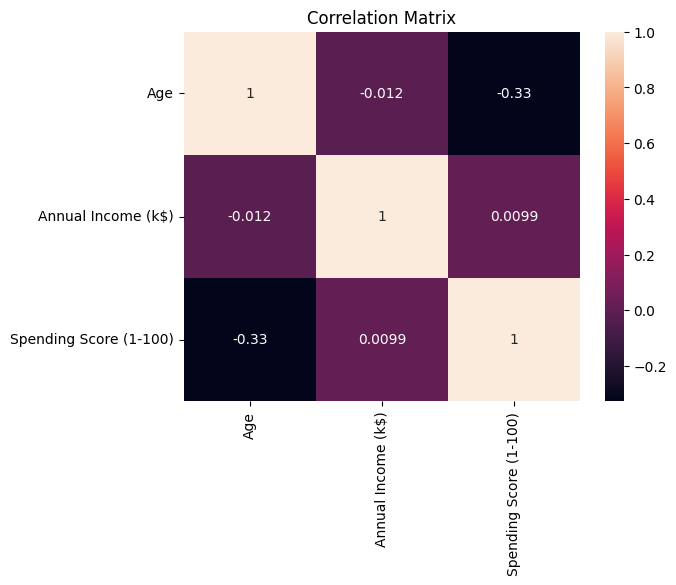

In [10]:
# Correlation Matrix for numerical features
corr_matrix = customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# 5. Clustering

Age, Annual Income and Spending Score will be used for clustering customers. The plot below shows without clustering

In [11]:
customer_clsuter_df = customer_df.copy()
# customer_kmeans_df['Gender'] = customer_kmeans_df['Gender'].map({'Male': 0, 'Female':1})

In [12]:
customer_clsuter_df = customer_clsuter_df.iloc[:, 2:5]
customer_clsuter_df.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## 5.1. K-Means Clustering

In [14]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 42)
    kmeans.fit(customer_clsuter_df)
    wcss.append(kmeans.inertia_)
    
fig = go.Figure(go.Scatter(x = [1,2,3,4,5,6,7,8,9,10], y = wcss))
fig['layout'].update(title = ' WCSS Vs Cluster Number ', xaxis_title = 'Cluster', yaxis_title = 'WCSS')
iplot(fig)

In [15]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 42)
identified_clusters = kmeans.fit_predict(customer_clsuter_df)

data_with_clusters = customer_df.copy()
data_with_clusters['Cluster'] = identified_clusters
fig = px.scatter_3d(
    data_with_clusters,
    x = 'Age',
    y = 'Annual Income (k$)',
    z = 'Spending Score (1-100)', 
    color = 'Cluster',
    size = 'Age')
iplot(fig)

In [16]:
silhouette_scores = []
n_clusters = [2,3,4,5,6,7,8,9,10]

for n in n_clusters:
    kmeans = KMeans(n_clusters = n, init = 'k-means++')
    cluster_labels = kmeans.fit_predict(customer_clsuter_df)
    silhouette_avg = silhouette_score(customer_clsuter_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
fig = go.Figure(go.Scatter(x = [2,3,4,5,6,7,8,9,10], y = silhouette_scores))
fig['layout'].update(title = ' Silhouette Scores Vs Cluster Number ', xaxis_title = 'Cluster', yaxis_title = 'WCSS')
iplot(fig)

## 5.2 Hierarchical Clustering

In [17]:
fig = ff.create_dendrogram(customer_clsuter_df, linkagefun = lambda x: sch.linkage(customer_clsuter_df, 'ward'))
fig['layout'].update(
    title = 'Hierarchical Clustering', 
    xaxis_title = 'Customers', 
    yaxis_title = 'Euclidean Distance', 
    width = 960, 
    height = 700)
iplot(fig)

In [18]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
identified_clusters = hc.fit_predict(customer_clsuter_df)
data_with_clusters = customer_df.copy()
data_with_clusters['Cluster'] = identified_clusters
fig = px.scatter_3d(data_with_clusters, 
                    x = 'Age', 
                    y = 'Annual Income (k$)',
                    z = 'Spending Score (1-100)', 
                    color = 'Cluster',
                    size = 'Age')

iplot(fig)

## 5.3 Affinity propagation

In [19]:
ap = AffinityPropagation(random_state = 0)
idenfied_clusters = ap.fit_predict(customer_clsuter_df)
data_with_clusters = customer_df.copy()
data_with_clusters['Cluster'] = identified_clusters
fig = px.scatter_3d(data_with_clusters, 
                    x = 'Age', 
                    y = 'Annual Income (k$)',
                    z = 'Spending Score (1-100)', 
                    color = 'Cluster',
                    size = 'Age')
iplot(fig)

## 5.4 DBSCAN

In [21]:
dbs = DBSCAN(eps = 9, min_samples = 5)
identified_customers = dbs.fit_predict(customer_clsuter_df)
data_with_customers = customer_df.copy()
data_with_customers['Cluster'] = identified_customers

fig = px.scatter_3d(data_with_clusters, 
                    x = 'Age', 
                    y = 'Annual Income (k$)',
                    z = 'Spending Score (1-100)', 
                    color = 'Cluster',
                    size = 'Age')
iplot(fig)